### Muhammad Kevin Alrahmanto (19/445592/PA/19416)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df_pet=pd.read_excel('data_pet.xlsx')
df_pet.tail()

,C,V,F,R,ω,L,D,Q
28,12.0,12.0,0.5,4.000000,500,15,240.0,Halus
29,15.0,14.0,2.0,1.000000,0,21,193.0,Halus
30,15.0,15.5,2.0,1.000000,0,22,220.0,Halus
31,12.0,15.0,0.5,2.333333,0,15,120.0,Bermanik
32,20.0,15.0,0.5,2.333333,0,15,490.0,Halus


In [33]:
df_pet.drop('D', axis=1, inplace=True)
df_pet['Q']=pd.get_dummies(df_pet['Q'])['Halus']

In [36]:
df_pet.columns

Index(['C', 'V', 'F', 'R', 'ω', 'L', 'Q'], dtype='object')

In [41]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df=pd.DataFrame(scaler.fit_transform(df_pet.iloc[:, :-1]), columns=df_pet.columns[:-1])
df['Halus']=df_pet['Q']
df.tail()

,C,V,F,R,ω,L,Halus
28,-0.857492,-0.998299,-0.659580,2.080306,0.179647,0.311882,1
29,-0.425912,-0.668035,-0.361721,-0.581206,-0.910122,2.517334,1
30,-0.425912,-0.420336,-0.361721,-0.581206,-0.910122,2.884910,1
31,-0.857492,-0.502902,-0.659580,0.601689,-0.910122,0.311882,0
32,0.293387,-0.502902,-0.659580,0.601689,-0.910122,0.311882,1


# Inverting hessian failed

In [42]:
import statsmodels.api as sm

X = df.iloc[:, :-1]
y = df['Halus']

logit = sm.Logit(y, sm.add_constant(X))
result = logit.fit(method='bfgs')

# Print the summary of the model
print(result.summary())

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 102
         Gradient evaluations: 90
                           Logit Regression Results                           
Dep. Variable:                  Halus   No. Observations:                   33
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            6
Date:                Wed, 08 Mar 2023   Pseudo R-squ.:                     inf
Time:                        19:58:08   Log-Likelihood:                -22.874
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const               0      0.348          0      1.000      -0.682       0.6

C:\Users\Kevin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Kevin\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Kevin\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\Kevin\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3511: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


## Uji Coba Lasso dengan lambda = 0.05

In [91]:
import statsmodels.api as sm
from statsmodels.genmod.families.links import logit
model = sm.GLM.from_formula("Halus ~ C + V + F + R + ω + L", family=sm.families.family.Binomial(link=logit()), data=df)

In [98]:
result = model.fit_regularized(alpha=0.04,method='elastic_net',L1_wt=1,refit=True) #LASSO 
result.summary()

C:\Users\Kevin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1346: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Halus   No. Observations:                   33
Model:                            GLM   Df Residuals:                       27
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                   elastic_net   Log-Likelihood:                -7.6232
Date:                Wed, 08 Mar 2023   Deviance:                       15.246
Time:                        20:54:48   Pearson chi2:                     36.7
No. Iterations:                    50   Pseudo R-squ. (CS):             0.5346
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3576      1.676      2.004      0.045       0.073       6.642
C              3.8344      2.003      1.914      0.056      -0.092       7.760
V             -2.8344      1.759     -1.611      0.107      -6.283       0.614
F             -0.2089      1.341     -0.156      0.876      -2.837       2.419
R              1.1778      0.916      1.286      0.198      -0.617       2.972
ω                   0          0        nan        nan           0           0
L              3.5695      2.132      1.674      0.094      -0.610       7.749
==============================================================================
"""

In [99]:
df['prob_halus']=np.round(result.predict()*100,3)
df

,C,V,F,R,ω,L,Halus,prob_halus
0,-1.145211,1.313551,1.624006,-1.088160,1.051462,-0.790844,0,0.010
1,-1.145211,1.313551,1.624006,-0.581206,1.051462,-0.790844,0,0.018
2,-1.145211,1.313551,1.624006,0.601689,1.051462,-0.790844,0,0.074
3,0.293387,1.313551,1.624006,-1.088160,1.051462,-0.790844,0,2.450
4,0.293387,1.313551,1.624006,-0.581206,1.051462,-0.790844,0,4.364
5,0.293387,1.313551,1.624006,0.601689,1.051462,-0.790844,0,15.525
6,1.731985,1.313551,1.624006,-1.088160,1.051462,-0.790844,1,86.197
7,1.731985,1.313551,1.624006,-0.581206,1.051462,-0.790844,1,91.900
8,1.731985,1.313551,1.624006,0.601689,1.051462,-0.790844,1,97.859
9,-1.476089,-0.668035,-0.748938,-0.581206,-0.060102,0.311882,1,54.396


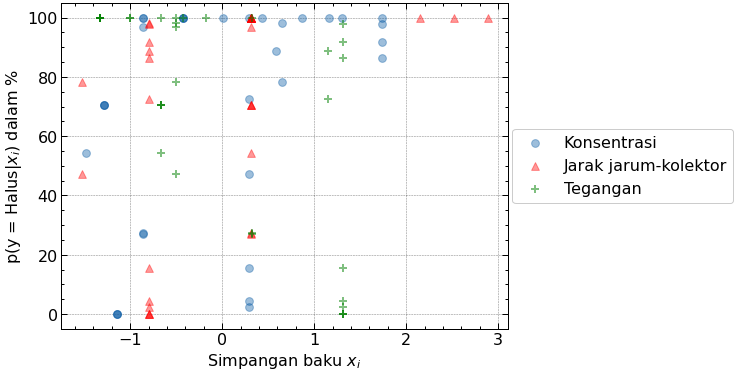

In [175]:
plt.scatter(df['C'], df['prob_halus'], marker='o',s=60, alpha=0.4, label='Konsentrasi')
plt.scatter(df['L'], df['prob_halus'], c='red',marker='^',s=60, alpha=0.4, label='Jarak jarum-kolektor')
plt.scatter(df['V'], df['prob_halus'], c='green',marker='+',s=60, alpha=0.5, label='Tegangan')
plt.xlabel('Simpangan baku $x_i$');
plt.ylabel('p(y = Halus|$x_i$) dalam %');
plt.legend(bbox_to_anchor=(1.01, 0.5), loc="center left", borderaxespad=0)

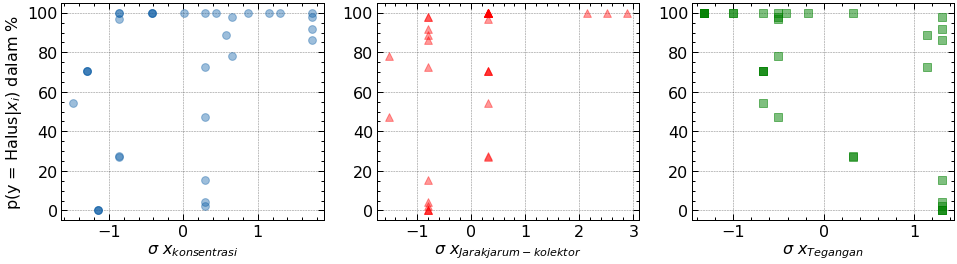

In [185]:
fig, ax=plt.subplots(1,3, figsize=(16,4))
ax[0].scatter(df['C'], df['prob_halus'], marker='o',s=60, alpha=0.4, label='Konsentrasi')
ax[1].scatter(df['L'], df['prob_halus'], c='red',marker='^',s=60, alpha=0.4, label='Jarak jarum-kolektor')
ax[2].scatter(df['V'], df['prob_halus'], c='green',marker='s',s=60, alpha=0.5, label='Tegangan')
ax[0].set_xlabel('$\sigma$ $x_{konsentrasi}$');
ax[1].set_xlabel('$\sigma$ $x_{Jarak jarum-kolektor}$');
ax[2].set_xlabel('$\sigma$ $x_{Tegangan}$');
ax[0].set_ylabel('p(y = Halus|$x_i$) dalam %');